In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


sns.set(style="whitegrid")


In [2]:
import pandas as pd

rnaseq = pd.read_csv("../data/processed/rnaseq_normalized.csv", index_col=0)
metabo = pd.read_csv("../data/processed/metabolomics_preprocessed.csv", index_col=0)

print("RNA-seq:", rnaseq.shape)
print("Metabo:", metabo.shape)
print("RNA-seq index (samples):", rnaseq.index[:5])
print("Metabo index (samples):", metabo.index[:5])


RNA-seq: (100, 100)
Metabo: (100, 100)
RNA-seq index (samples): Index(['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5'], dtype='object')
Metabo index (samples): Index(['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5'], dtype='object', name='sample_id')


In [3]:
df = pd.read_csv("../data/processed/integrated_dataset.csv", index_col=0)
df.head()


,gene_1_rna,gene_2_rna,gene_3_rna,gene_4_rna,gene_5_rna,gene_6_rna,gene_7_rna,gene_8_rna,gene_9_rna,gene_10_rna,...,metabolite_94_metabo,metabolite_95_metabo,metabolite_96_metabo,metabolite_97_metabo,metabolite_98_metabo,metabolite_99_metabo,metabolite_100_metabo,age,sex,outcome
sample_1,9353.233831,10945.273632,8358.208955,10348.258706,11542.288557,8557.213930,9154.228856,9751.243781,10348.258706,8955.223881,...,-0.298567,-0.486367,NaN,0.220575,0.258638,0.000991,-0.499336,68,M,non-responder
sample_2,9777.958851,9166.836423,11815.033612,8555.713995,13037.278468,10389.081279,8352.006519,12222.448564,11000.203707,9574.251375,...,NaN,0.181102,0.274881,-2.119675,0.176366,0.053192,NaN,58,F,non-responder
sample_3,10138.630250,10759.362715,11173.184358,9517.897786,11173.184358,12621.560108,10759.362715,13035.381750,6828.057107,9724.808607,...,0.785041,0.328884,-1.315712,0.591424,0.291948,0.599081,0.578041,44,M,responder
sample_4,9969.481180,11190.233978,8952.187182,9562.563581,12410.986775,10783.316378,8341.810783,10579.857579,12207.527976,8341.810783,...,1.241009,0.809865,-0.737890,NaN,0.835875,-0.127537,1.030194,72,F,non-responder
sample_5,11089.494163,8754.863813,9143.968872,12062.256809,12840.466926,8365.758755,11478.599222,11089.494163,10505.836576,8560.311284,...,-1.988640,0.958520,0.385892,NaN,-0.151170,-2.117852,NaN,37,F,responder


In [4]:
df = pd.read_csv("../data/processed/integrated_dataset.csv", index_col=0)
print(df.shape)

(100, 203)


Class distribution:
outcome
non-responder    50
responder        50
Name: count, dtype: int64


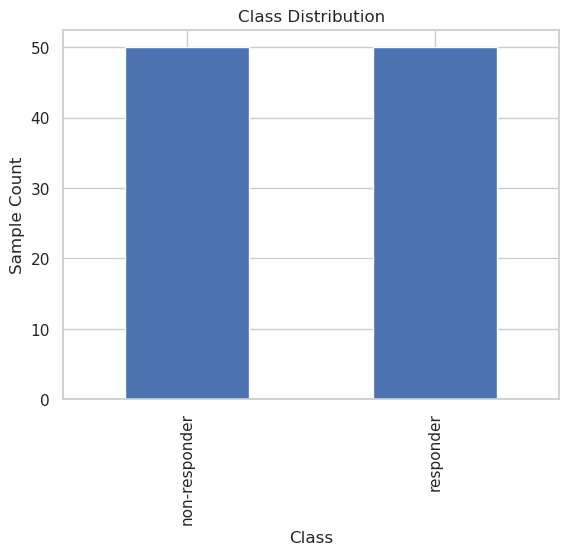

In [7]:
# Add outcome if missing
if 'outcome' not in df.columns or df['outcome'].isna().all():
    np.random.seed(0)
    df['outcome'] = np.random.choice(['Healthy', 'Diseased'], size=len(df))

# Show class distribution
print("Class distribution:")
print(df['outcome'].value_counts())

# Plot class distribution
df['outcome'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Sample Count")
plt.show()


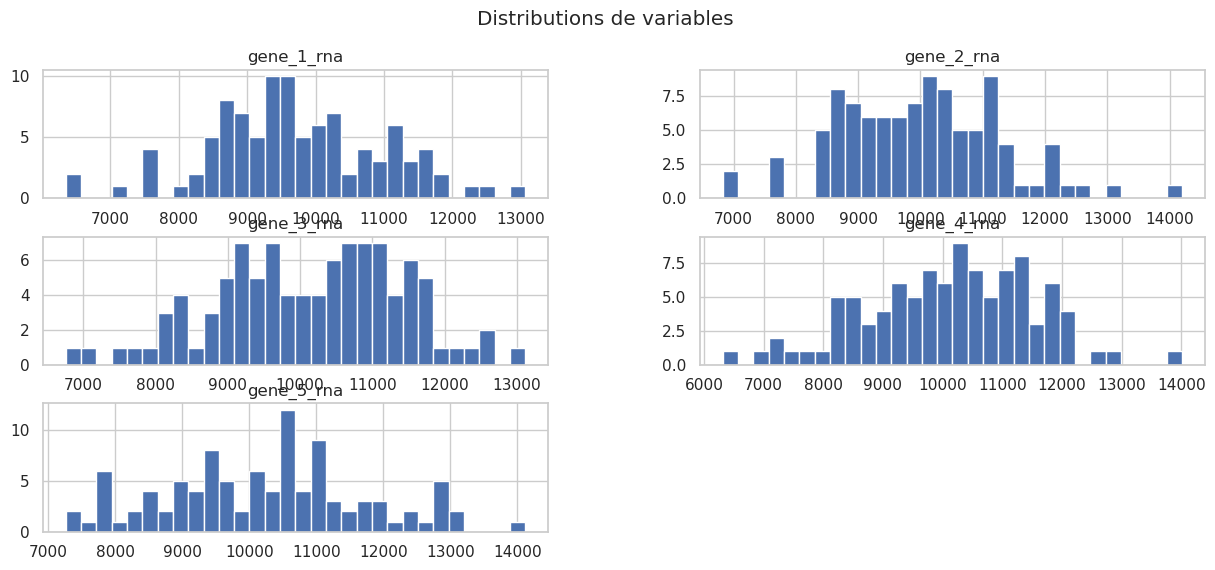

In [ ]:
# Plot distributions of first 5 numerical features
cols_to_plot = df.select_dtypes(include=np.number).columns[:5]

df[cols_to_plot].hist(bins=30, figsize=(15, 6))
plt.suptitle("Distributions of Selected Features")
plt.show()


Integrated dataset shape: (100, 203)
            gene_1_rna    gene_2_rna    gene_3_rna    gene_4_rna  \
sample_1   9353.233831  10945.273632   8358.208955  10348.258706   
sample_2   9777.958851   9166.836423  11815.033612   8555.713995   
sample_3  10138.630250  10759.362715  11173.184358   9517.897786   
sample_4   9969.481180  11190.233978   8952.187182   9562.563581   
sample_5  11089.494163   8754.863813   9143.968872  12062.256809   

            gene_5_rna    gene_6_rna    gene_7_rna    gene_8_rna  \
sample_1  11542.288557   8557.213930   9154.228856   9751.243781   
sample_2  13037.278468  10389.081279   8352.006519  12222.448564   
sample_3  11173.184358  12621.560108  10759.362715  13035.381750   
sample_4  12410.986775  10783.316378   8341.810783  10579.857579   
sample_5  12840.466926   8365.758755  11478.599222  11089.494163   

            gene_9_rna  gene_10_rna  ...  metabolite_94_metabo  \
sample_1  10348.258706  8955.223881  ...             -0.298567   
sample_2  110

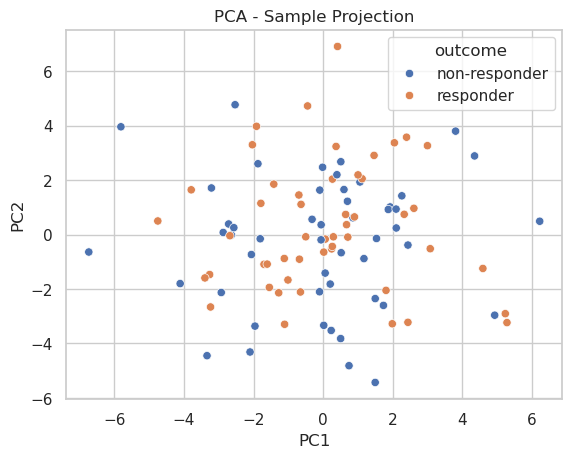

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Dataset dimensions and preview
print("Integrated dataset shape:", df.shape)
print(df.head())

# Separate features and target
X = df.drop(columns=['outcome'])
y = df['outcome']

# Encode categorical 'sex' variable if present
if 'sex' in X.columns:
    X['sex'] = X['sex'].map({'M': 0, 'F': 1})

# Remove empty columns
X = X.dropna(axis=1, how='all')

# Report columns with missing values
print("Missing values per column:")
print(X.isna().sum()[X.isna().sum() > 0])

# Impute missing values with column means
X = X.fillna(X.mean(numeric_only=True))

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled data shape:", X_scaled.shape)

# Check minimum number of samples before PCA
if X_scaled.shape[0] < 2:
    print("PCA not performed: at least 2 samples required.")
    print(f"Samples available: {X_scaled.shape[0]}")
else:
    # Run PCA
    pca = PCA(n_components=2)
    components = pca.fit_transform(X_scaled)

    # Prepare PCA results for plotting
    pca_df = pd.DataFrame(components, columns=['PC1', 'PC2'])
    pca_df['outcome'] = y.values

    # Plot PCA
    sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='outcome')
    plt.title("PCA - Sample Projection")
    plt.savefig("pca_plot.png")
    plt.show()
